In [2]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from acquire import get_crime_data
import prepare

In [3]:
df = get_crime_data(use_cache = False)

Acquiring data from api


In [4]:
df = prepare.prep_data(df)

In [5]:
#Assign my .shp file to a variable named “asutin_map”
austin_map = gpd.read_file('Boundaries_zipcode/geo_export_9b5aa23d-57b1-41f4-b4f9-0a9d97fac540.shp')

In [6]:
austin_map = austin_map.drop(columns =['affgeoid10','geoid10','aland10','awater10'])

In [7]:
austin_map = austin_map.rename(columns ={'zcta5ce10': 'zip_code'})

In [8]:
#create a new dataframe with both our geographical and statistical data in it by merging our two tables together.
new_df = austin_map.merge(df, on ='zip_code')

In [9]:
new_df.to_csv('Geo_Crime_Reports.csv')

In [13]:
new_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 349523 entries, 0 to 349522
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   zip_code          349523 non-null  object        
 1   geometry          349523 non-null  geometry      
 2   crime_type        349523 non-null  object        
 3   family_violence   349523 non-null  object        
 4   occurence_date    349523 non-null  datetime64[ns]
 5   occurence_time    349523 non-null  object        
 6   report_date       349523 non-null  datetime64[ns]
 7   report_time       349523 non-null  object        
 8   location_type     349523 non-null  object        
 9   address           349523 non-null  object        
 10  council_district  349523 non-null  object        
 11  sector            349523 non-null  object        
 12  district          349523 non-null  object        
 13  latitude          349523 non-null  float64       
 

In [12]:
new_df.head()

,zip_code,geometry,crime_type,family_violence,occurence_date,occurence_time,report_date,report_time,location_type,address,council_district,sector,district,latitude,longitude,clearance_status,clearance_date
0,78745,"POLYGON ((-97.84494 30.20041, -97.83965 30.199...",BURGLARY OF VEHICLE,N,2021-12-31,22:28,2021-12-31,22:28,PARKING /DROP LOT/ GARAGE,901 LITTLE TEXAS LN,2,FR,4,30.198187,-97.769155,not cleared,2022-01-03
1,78745,"POLYGON ((-97.84494 30.20041, -97.83965 30.199...",ASSAULT BY CONTACT FAM/DATING,Y,2021-12-31,18:56,2021-12-31,18:56,RESIDENCE / HOME,4320 S CONGRESS AVE,3,DA,3,30.219033,-97.767189,not cleared,2022-01-03
2,78745,"POLYGON ((-97.84494 30.20041, -97.83965 30.199...",BURGLARY OF VEH-NO SUSPECT/FU,N,2021-12-31,18:00,2022-01-07,10:19,RESIDENCE / HOME,7001 COOPER LN,2,FR,3,30.195661,-97.792699,not cleared,2022-01-10
3,78745,"POLYGON ((-97.84494 30.20041, -97.83965 30.199...",BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT,N,2021-12-31,18:00,2022-01-10,14:57,COMMERCIAL / OFFICE BUILDING,4501 TERRY O LN,3,DA,3,30.213162,-97.760094,not cleared,2022-01-12
4,78745,"POLYGON ((-97.84494 30.20041, -97.83965 30.199...",FAMILY DISTURBANCE,N,2021-12-31,15:55,2021-12-31,16:33,OTHER / UNKNOWN,E WILLIAM CANNON DR / S CONGRESS AVE,2,FR,3,30.193012,-97.778879,not cleared,2022-01-26


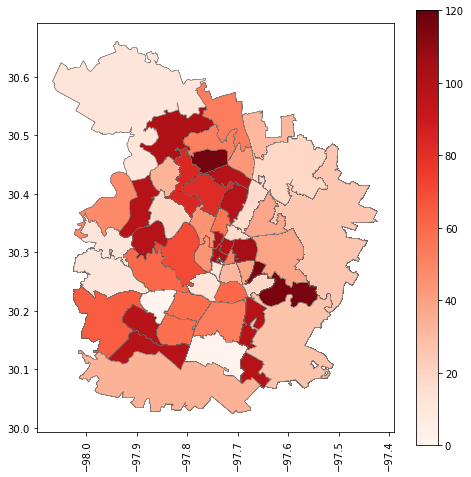

In [16]:
#Crime_type by zip_code
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
new_df.plot(column="crime_type", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
bar_info._A = []
cbar = fig.colorbar(bar_info)